In [1]:
# Given a fixed number of assets available for response, how often do we approach 10%, 25% and 50% of resources being used.
# When was the highest percent of resources used and for how long?
# What happens to overall response times when these occur?
# What stations are consistently at the highest % time of resources being used?
# Is it because they are handling their own calls or another area’s?

import pandas as pd
from pprint import pprint
import boto3
import os
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.dates as md
import time
import datetime
import numpy as np
import statistics
from collections import defaultdict
%matplotlib inline

client = boto3.client('s3')
bucket_name = 'rescue-me-team-bucket'
object_key = 'data/GMU_2021_Summer_Capacity.csv'
csv_obj = client.get_object(Bucket=bucket_name, Key=object_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

# read csv to in mem dataframe
capacity_df = pd.read_csv(StringIO(csv_string))

# mark unit types
def mark_unit_type(x):
    if x[0]=='A':
        return 'ambulance'
    elif x[0]=='E':
        return 'engine'
    elif x[0]=='M':
        return 'medic'
    elif x[0]=='R':
        return 'rescue squad'
    elif x[:2] in ['TT','TL'] or x[0] == 'T':
        return 'truck/tiller/tower'
    # nothing picked up return none
    return 'unknown'

def fix_inc_bn(x):
    if x != 'nan':
        try:
            return str(int(float(x)))
        except:
            print('fix bn',x,type(x))
    return 'unknown'

def fix_first_due(x):
    if x is not None and x != 'nan':
        try:
            return str(int(float(x)))
        except:
            print('fix first due',x,type(x))
    return 'na'

def fix_unit_station(x):
    station_lookup_table={
    '1':'01',
    '2':'02',
    '3':'03',
    '4':'04',
    '5':'05',
    '6':'06',
    '7':'07',
    '8':'08',
    '9':'09' }
       
    if x in station_lookup_table:
        return station_lookup_table[x]
    return x

lookup_table={
'AK':'acknowledge',
'AM':'available on mobile (cell phone)',
'AQ':'available in quarters (station)',
'AR':'available on radio',
'DP':'dispatched',
'ER':'enroute',
'OS':'on-scene',
'OT':'out of service',
'TA':'transport arrived (at medical facility)',
'TR':'transport (begins)',
'WP':'with patient'}

# add description of that status
capacity_df['status_desc']=capacity_df['CAD_UnitStatus'].map(lookup_table)

# fix unit station issues
capacity_df['UnitStation']=capacity_df['UnitStation'].astype(str)
capacity_df['UnitStation']=capacity_df.apply(lambda x: fix_unit_station(x['UnitStation']), axis=1)


# add the day of the timestamp
capacity_df['day']=capacity_df['CAD_Timestamp'].str[:8]

# cleanup string issues
capacity_df['UnitBattalion']=capacity_df['UnitBattalion'].astype(str)
capacity_df['IncidentBattalion']=capacity_df['IncidentBattalion'].astype(str)

# add unit type descriptions
capacity_df['unit_type'] = capacity_df.apply(lambda x: mark_unit_type(x['CAD_UnitID']), axis=1)

# int and flaot cleanup (to str)
capacity_df['IncidentFirstDue'] = capacity_df.apply(lambda x: fix_first_due(x['IncidentFirstDue']), axis=1)
capacity_df['IncidentBattalion'] = capacity_df.apply(lambda x: fix_inc_bn(x['IncidentBattalion']), axis=1)

# first due station
capacity_df['first_due_station']=capacity_df['IncidentFirstDue'].str[-2:]

capacity_df

# check for duplicates
# capacity_df[capacity_df.duplicated(keep=False)]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due nan <class 'float'>
fix first due 

IncidentNumber      CallConfirmedDT IncidentCategory  \
0           E170010002  2017-01-01 00:01:10                E   
1           E170010002  2017-01-01 00:01:10                E   
2           E170010002  2017-01-01 00:01:10                E   
3           E170010008  2017-01-01 00:01:01                F   
4           E170010008  2017-01-01 00:01:01                F   
...                ...                  ...              ...   
4420055     E203662405  2020-12-31 23:47:48                E   
4420056     E203662422  2020-12-31 23:56:27                E   
4420057     E203662422  2020-12-31 23:56:27                E   
4420058     E203662422  2020-12-31 23:56:27                E   
4420059     E203662422  2020-12-31 23:56:27                E   

        IncidentBattalion IncidentFirstDue CAD_UnitID UnitBattalion  \
0                 unknown               na       E410           408   
1                 unknown               na       E410           408   
2                 unknown               na      M410B           408   
3                     401              439       E439           401   
4                     401              439      TT425           401   
...                   ...              ...        ...           ...   
4420055               408              422       M422           408   
4420056               402              444       E413           402   
4420057               402              444       M413           402   
4420058               402              444       M413           402   
4420059               402              444       M413           402   

        UnitStation     CAD_Timestamp CAD_UnitStatus Shift  \
0                10  20170101000307ES             ER     C   
1                10  20170101000926ES             WP     C   
2                10  20170101012905ES             CU     C   
3                39  20170101000302ES             DP     C   
4                25  20170101000520ES             ER     C   
...             ...               ...            ...   ...   
4420055          22  20210101001603ES             TA     A   
4420056          13  20210101000330ES             OS     A   
4420057          13  20201231235831ES             DP     A   
4420058          13  20210101000427ES             WP     A   
4420059          13  20210101003244ES             UC     A   

                                     status_desc       day  \
0                                        enroute  20170101   
1                                   with patient  20170101   
2                                            NaN  20170101   
3                                     dispatched  20170101   
4                                        enroute  20170101   
...                                          ...       ...   
4420055  transport arrived (at medical facility)  20210101   
4420056                                 on-scene  20210101   
4420057                               dispatched  20201231   
4420058                             with patient  20210101   
4420059                                      NaN  20210101   

                  unit_type first_due_station  
0                    engine                na  
1                    engine                na  
2                     medic                na  
3                    engine                39  
4        truck/tiller/tower                39  
...                     ...               ...  
4420055               medic                22  
4420056              engine                44  
4420057               medic                44  
4420058               medic                44  
4420059               medic                44  

[4420060 rows x 15 columns]

In [4]:
# capacity_df.dtypes

In [2]:
# look at samples of first due vs. station
capacity_df[['IncidentFirstDue','first_due_station','UnitStation']].iloc[100:150]

IncidentFirstDue first_due_station UnitStation
100              429                29          29
101              430                30          30
102              430                30          30
103              422                22          22
104              422                22          22
105              422                22          22
106              422                22          22
107               na                na          11
108               na                na          11
109               na                na          11
110               na                na          11
111               na                na          11
112               na                na          11
113              409                09          09
114              409                09          09
115              409                09          24
116              408                08          08
117              408                08          08
118              408                08          08
119              411                11          24
120              408                08          26
121              408                08          08
122              401                01          01
123              102                02          10
124              408                08          26
125              408                08          26
126              438                38          38
127              438                38          38
128              438                38          38
129              208                08          05
130              208                08          05
131              425                25          25
132              425                25          25
133              425                25          25
134              423                23          23
135              423                23          23
136              424                24          09
137              424                24          37
138              424                24          24
139              425                25          04
140              425                25          04
141              425                25          04
142              423                23          23
143              423                23          23
144              423                23          23
145              411                11          11
146              411                11          11
147              411                11          11
148              411                11          11
149              424                24          37

In [4]:
capacity_df['IncidentBattalion'].unique()

array(['unknown', '401', '406', '403', '404', '402', '408', '405', '407',
       '443', '465'], dtype=object)

In [5]:
capacity_df['UnitBattalion'].unique()

array(['408', '401', '406', '403', '404', '402', '405', '407',
       'Training Academy'], dtype=object)

In [6]:
first_due_list=sorted(capacity_df['IncidentFirstDue'].unique())
first_due_list

['101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '161',
 '201',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '301',
 '302',
 '303',
 '401',
 '402',
 '403',
 '404',
 '405',
 '408',
 '409',
 '410',
 '411',
 '412',
 '413',
 '414',
 '415',
 '416',
 '417',
 '418',
 '419',
 '420',
 '421',
 '422',
 '423',
 '424',
 '425',
 '426',
 '427',
 '428',
 '429',
 '430',
 '431',
 '432',
 '433',
 '434',
 '435',
 '436',
 '437',
 '438',
 '439',
 '440',
 '441',
 '442',
 '444',
 '463',
 '464',
 '465',
 '466',
 '502',
 '504',
 '507',
 '508',
 '510',
 '511',
 '512',
 '514',
 '516',
 '520',
 '521',
 '523',
 '524',
 '525',
 '526',
 '569',
 '601',
 '606',
 '607',
 '609',
 '611',
 '618',
 '619',
 '620',
 '622',
 '623',
 '624',
 '627',
 '700',
 '710',
 '800',
 '821',
 '823',
 '824',
 '825',
 '827',
 '829',
 '832',
 '842',
 '847',
 '9800',
 'na']

In [ ]:
sorted(list(capacity_df['UnitStation'].unique()))

In [8]:
capacity_df.isna().sum()

IncidentNumber            0
CallConfirmedDT           0
IncidentCategory          0
IncidentBattalion         0
IncidentFirstDue          0
CAD_UnitID                0
UnitBattalion             0
UnitStation               0
CAD_Timestamp             0
CAD_UnitStatus            0
Shift                     0
status_desc          344967
day                       0
unit_type                 0
first_due_station         0
dtype: int64

In [ ]:
capacity_df[capacity_df['status_desc'].isna()]['CAD_UnitStatus'].unique()

In [ ]:
capacity_df[capacity_df['CAD_UnitStatus']=='~']

In [7]:
# 4 year timespan
print('min time:',capacity_df['CAD_Timestamp'].min())
print('max time:',capacity_df['CAD_Timestamp'].max())

min time: 20170101000137ES
max time: 20210101004928ES


In [6]:
capacity_df['IncidentNumber'].nunique() # ~100 k unique incidents per year

407569

In [ ]:
print('# unique Battalions:',capacity_df['UnitBattalion'].nunique()) # 17 unique Battalions
capacity_df['UnitBattalion'].unique()

In [ ]:
capacity_df['IncidentBattalion'].unique()

In [ ]:
print('# unique first due:',capacity_df['IncidentFirstDue'].nunique())
capacity_df['IncidentFirstDue'].unique()

In [9]:
print('# unique unit station:',capacity_df['UnitStation'].nunique()) # 77 unique stations
capacity_df['UnitStation'].unique()

# unique unit station: 39


array(['10', '39', '25', '24', '17', '28', '11', '30', '36', '13', '29',
       '22', '35', '09', '08', '26', '01', '38', '05', '31', '23', '37',
       '04', '14', '27', '12', '18', '34', '15', '21', '40', '42', '19',
       '41', '20', '32', '02', '16', 'TA'], dtype=object)

In [6]:
print('# unique CAD unitID:',capacity_df['CAD_UnitID'].nunique()) # 171 unique units
capacity_df['CAD_UnitID'].unique()

# unique CAD unitID: 171


array(['E410', 'M410B', 'E439', 'TT425', 'E425', 'M425', 'E424', 'M424',
       'E417', 'M417', 'E428', 'M428', 'M411', 'E430', 'M439', 'R439',
       'TL436', 'M411B', 'E413', 'E429', 'M413', 'M430', 'E422', 'T422',
       'E435', 'E409', 'T424', 'E408', 'M408', 'E426', 'M408B', 'M401',
       'M426', 'E438', 'T438', 'M405', 'R426', 'M431', 'E423', 'M429',
       'TT429', 'E411', 'R411', 'M438', 'M423', 'E437', 'M404', 'T411',
       'M422', 'M414', 'R414', 'M427', 'E412', 'M418', 'M434', 'M415',
       'M435', 'E421', 'TL440', 'M412', 'E415', 'E434', 'E442', 'M442',
       'M409', 'E414', 'E419', 'M419', 'M410', 'T441', 'E418', 'R418',
       'E420', 'E432', 'M432', 'E405', 'M402', 'E402', 'E431', 'E404',
       'R401', 'TL430', 'T405', 'E401', 'M416', 'M409B', 'M437', 'E427',
       'E416', 'E436', 'R419', 'M440', 'TT410', 'TL401', 'E440', 'TL408',
       'M421', 'A410', 'M436', 'A437E', 'A422E', 'A413E', 'R421', 'M422B',
       'M405E', 'M420', 'A402E', 'E441', 'M441', 'TL405', 'A4

In [9]:
print('# unique unit types:',capacity_df['unit_type'].nunique())
capacity_df['unit_type'].unique()

# unique unit types: 5


array(['engine', 'medic', 'truck/tiller/tower', 'rescue squad',
       'ambulance'], dtype=object)

In [30]:
%%time
def process_df(df):
    # intialize values for the whole fleet
    current_dict={}
    day_max_dict={}
    return_set=set(['AM','AQ','AR'])
    max_deployment=0
    current_deploy_per=0.0
    prev_deploy_per=0.0
    count_10,count_25,count_50=0,0,0
    unique_unit_count=df['CAD_UnitID'].nunique()

    # deep only dispatch or available events
    temp_df=df[capacity_df['CAD_UnitStatus'].isin(['AM','AQ','AR','DP'])]
    # sort entire df
    temp_df.sort_values(by=['CAD_Timestamp'])

    # loop through every element in df
    for index, row in temp_df.sort_values(by=['CAD_Timestamp'])[:].iterrows():    
        # if dispatched add unit to collection of dispatched units
        if row['CAD_UnitStatus']=='DP':
            # add to master dictionary
            current_dict[row['CAD_UnitID']]=row    
        # if AM, AQ, or AR then release
        elif row['CAD_UnitStatus'] in return_set:
            # remove from master dictionary
            if row['CAD_UnitID'] in current_dict:
                del current_dict[row['CAD_UnitID']]

        # check length of set vs. max
        current_num = len(current_dict)
        
        # get number that are "out of zone"
        out_of_zone_count=0
        for v in current_dict.values():
            # if v['IncidentBattalion'] != v['UnitBattalion']:
            if v['first_due_station'] != v['UnitStation']:
                out_of_zone_count+=1
        
        if current_num > max_deployment:
            max_deployment=len(current_dict) # record a new max number of unique units deployed
            print('new max deployed #:',len(current_dict),row['CAD_Timestamp'])
            max_dict = current_dict.copy() # copy all the units deployed at the new max

        # populate the dict that will track the max % deployed per day
        current_deploy_per=current_num/unique_unit_count
        
        # get % deployed from out of zone
        if len(current_dict) > 0:
            out_of_zone_per=out_of_zone_count/len(current_dict)
        else:
            out_of_zone_per=0.0
        
        if row['day'] not in day_max_dict:
            day_max_dict[row['day']]=(current_deploy_per, out_of_zone_per, row['CAD_Timestamp']) # include timestamp here
        else:
            if current_deploy_per > day_max_dict[row['day']][0]:
                day_max_dict[row['day']]=(current_deploy_per, out_of_zone_per, row['CAD_Timestamp'])

    # print('\n','max len dict:',len(max_dict))
    for i,v in max_dict.items():
        print(i,'|',v['CAD_Timestamp'][0:4],v['CAD_Timestamp'][4:6],v['CAD_Timestamp'][6:8],v['CAD_Timestamp'],v['first_due_station'],v['UnitStation'],v['first_due_station']==v['UnitStation'],v['IncidentNumber'])
    
    # return a dictionary with the max % deployed by day, as well as a count of the max # deployed
    return day_max_dict, max_deployment, max_dict

# establish essential units
essential_unit_list=['E410', 'E439', 'E425', 'E424', 'E417', 'E428', 'E430', 'E413',
       'E429', 'E422', 'E435', 'E409', 'E408', 'E426', 'E438', 'E423',
       'E411', 'E437', 'E412', 'E421', 'E415', 'E434', 'E442', 'E414',
       'E419', 'E418', 'E420', 'E432', 'E405', 'E402', 'E431', 'E404',
       'E401', 'E427', 'E416', 'E436', 'E440', 'E441','M410B', 'M425', 'M424', 'M417', 'M428', 'M411', 'M439', 'M411B',
       'M413', 'M430', 'M408', 'M408B', 'M401', 'M426', 'M405', 'M431',
       'M429', 'M438', 'M423', 'M404', 'M422', 'M414', 'M427', 'M418',
       'M434', 'M415', 'M435', 'M412', 'M442', 'M409', 'M419', 'M410',
       'M432', 'M402', 'M416', 'M409B', 'M437', 'M440', 'M421', 'M436',
       'M422B', 'M405E', 'M420', 'M441']
essential_df=capacity_df[capacity_df['CAD_UnitID'].isin(essential_unit_list)]

# pick out the individual unit types that we want to run
overall_day_max_dict,overall_max_deployment,overall_max_dict=process_df(capacity_df)
# essential_day_max_dict,essential_max_deployment,essential_max_dict=process_df(essential_df)
# ambulance_day_max_dict,ambulance_max_deployment,ambulance_max_dict=process_df(capacity_df[capacity_df['unit_type']=='ambulance'])
# engine_day_max_dict,engine_max_deployment,engine_max_dict=process_df(capacity_df[capacity_df['unit_type']=='engine'])
# medic_day_max_dict,medic_max_deployment,medic_max_dict=process_df(capacity_df[capacity_df['unit_type']=='medic'])
rescue_day_max_dict,rescue_max_deployment,rescue_max_dict=process_df(capacity_df[capacity_df['unit_type']=='rescue squad'])
# ttt_day_max_dict,ttt_max_deployment,ttt_max_dict=process_df(capacity_df[capacity_df['unit_type']=='truck/tiller/tower'])

new max deployed #: 1 20170101000137ES
new max deployed #: 2 20170101000137ES
new max deployed #: 3 20170101000302ES
new max deployed #: 4 20170101000303ES
new max deployed #: 5 20170101000523ES
new max deployed #: 6 20170101000524ES
new max deployed #: 7 20170101000801ES
new max deployed #: 8 20170101000802ES
new max deployed #: 9 20170101001142ES
new max deployed #: 10 20170101001143ES
new max deployed #: 11 20170101001223ES
new max deployed #: 12 20170101001224ES
new max deployed #: 13 20170101001309ES
new max deployed #: 14 20170101001433ES
new max deployed #: 15 20170101001434ES
new max deployed #: 16 20170101001514ES
new max deployed #: 17 20170101001515ES
new max deployed #: 18 20170101001612ES
new max deployed #: 19 20170101003307ES
new max deployed #: 20 20170101003407ES
new max deployed #: 21 20170101003408ES
new max deployed #: 22 20170101003448ES
new max deployed #: 23 20170101003525ES
new max deployed #: 24 20170101003614ES
new max deployed #: 25 20170101010018ES
new max d

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


new max deployed #: 1 20170101001514ES
new max deployed #: 2 20170101005621ES
new max deployed #: 3 20170101184219ES
new max deployed #: 4 20170103091657ES
new max deployed #: 5 20170110184830ES
new max deployed #: 6 20170212234508ES
new max deployed #: 7 20180502142815ED
R439 | 2018 05 02 20180502124707ED 38 39 False E181221324
R421 | 2018 05 02 20180502125120ED 38 21 False E181221324
R411 | 2018 05 02 20180502125715ED 38 11 False E181221324
R401 | 2018 05 02 20180502133123ED 38 01 False E181221450
R419 | 2018 05 02 20180502134859ED 38 19 False E181221557
R414 | 2018 05 02 20180502140944ED 03 14 False E181221626
R418 | 2018 05 02 20180502142815ED 21 18 False E181221698
CPU times: user 7min 56s, sys: 316 ms, total: 7min 56s
Wall time: 7min 56s


In [31]:
overall_day_max_dict

{'20170101': (0.1695906432748538, 0.4482758620689655, '20170101194136ES'),
 '20170102': (0.18128654970760233, 0.3870967741935484, '20170102183808ES'),
 '20170103': (0.24561403508771928, 0.5714285714285714, '20170103121554ES'),
 '20170104': (0.16374269005847952, 0.5357142857142857, '20170104172700ES'),
 '20170105': (0.17543859649122806, 0.4, '20170105123657ES'),
 '20170106': (0.22807017543859648, 0.5384615384615384, '20170106153559ES'),
 '20170107': (0.14619883040935672, 0.36, '20170107190439ES'),
 '20170108': (0.17543859649122806, 0.5333333333333333, '20170108133047ES'),
 '20170109': (0.23391812865497075, 0.575, '20170109114250ES'),
 '20170110': (0.19298245614035087, 0.3333333333333333, '20170110185330ES'),
 '20170111': (0.19883040935672514, 0.5294117647058824, '20170111094902ES'),
 '20170112': (0.21637426900584794, 0.40540540540540543, '20170112130812ES'),
 '20170113': (0.19883040935672514, 0.47058823529411764, '20170113113227ES'),
 '20170114': (0.1871345029239766, 0.25, '201701141354

In [33]:
# visualize times of day when peaks are occuring
time_dict=defaultdict(int)

# histogram of busiest times
for v in list(overall_day_max_dict.values())[:]:
    # print(v[2],v[2][8:10])
    time_dict[v[2][8:10]]+=1
    

key_list=list(time_dict.keys())
sorted_keys=sorted(key_list)
sorted_values=[]
for i in sorted_keys:
    sorted_values.append(time_dict[i])
sorted_values

[11,
 1,
 1,
 4,
 2,
 2,
 14,
 65,
 93,
 150,
 175,
 138,
 150,
 115,
 137,
 119,
 103,
 82,
 51,
 31,
 8,
 10]

In [35]:
plt.rcParams["figure.figsize"] = (12,6)

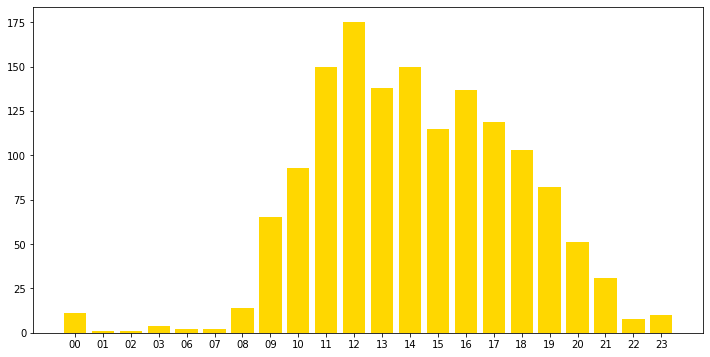

In [36]:
plt.bar(sorted_keys,sorted_values,color='gold')
plt.show()

In [118]:
units=[]
times=[]
offset=-5
for k,v in overall_max_dict.items():
    print(k,v['CAD_Timestamp'][:offset])
    units.append(k)
    times.append(v['CAD_Timestamp'][:offset])

E423 201805021307
M438 201805021243
M428 201805021244
E438 201805021246
E436 201805021246
E421 201805021246
E415 201805021247
T438 201805021247
TL436 201805021247
R439 201805021247
M434 201805021250
R421 201805021251
E431 201805021251
E428 201805021253
M416 201805021253
M408B 201805021255
TT429 201805021255
M442 201805021257
M440 201805021257
R411 201805021257
M410 201805021259
A401E 201805021300
M417 201805021302
M431 201805021306
E412 201805021315
E416 201805021318
M439 201805021318
M404 201805021319
M436 201805021320
TL440 201805021321
E442 201805021322
E440 201805021322
M421 201805021324
E434 201805021328
TT425 201805021329
E414 201805021330
E432 201805021330
R401 201805021331
E413 201805021336
M432 201805021336
E404 201805021340
M418 201805021340
M426 201805021340
M415 201805021342
M409B 201805021343
M405 201805021344
E435 201805021348
E402 201805021348
R419 201805021348
M425 201805021349
E417 201805021353
E401 201805021353
E427 201805021354
M427 201805021354
E439 201805021354
M40

In [143]:
myDate = "20180502130722"
datetime.datetime.strptime(myDate, "%Y%m%d%H%M%S")

datetime.datetime(2018, 5, 2, 13, 7, 22)

E423 20180502130722
M438 20180502124326
M428 20180502124419
E438 20180502124655
E436 20180502124657
E421 20180502124659
E415 20180502124701
T438 20180502124703
TL436 20180502124705
R439 20180502124707
M434 20180502125045
R421 20180502125120
E431 20180502125136
E428 20180502125316
M416 20180502125318
M408B 20180502125533
TT429 20180502125542
M442 20180502125705
M440 20180502125707
R411 20180502125715
M410 20180502125912
A401E 20180502130001
M417 20180502130220
M431 20180502130638
E412 20180502131516
E416 20180502131846
M439 20180502131856
M404 20180502131906
M436 20180502132036
TL440 20180502132114
E442 20180502132220
E440 20180502132245
M421 20180502132431
E434 20180502132854
TT425 20180502132918
E414 20180502133033
E432 20180502133037
R401 20180502133123
E413 20180502133608
M432 20180502133626
E404 20180502134022
M418 20180502134027
M426 20180502134054
M415 20180502134239
M409B 20180502134327
M405 20180502134405
E435 20180502134849
E402 20180502134851
R419 20180502134859
M425 20180502

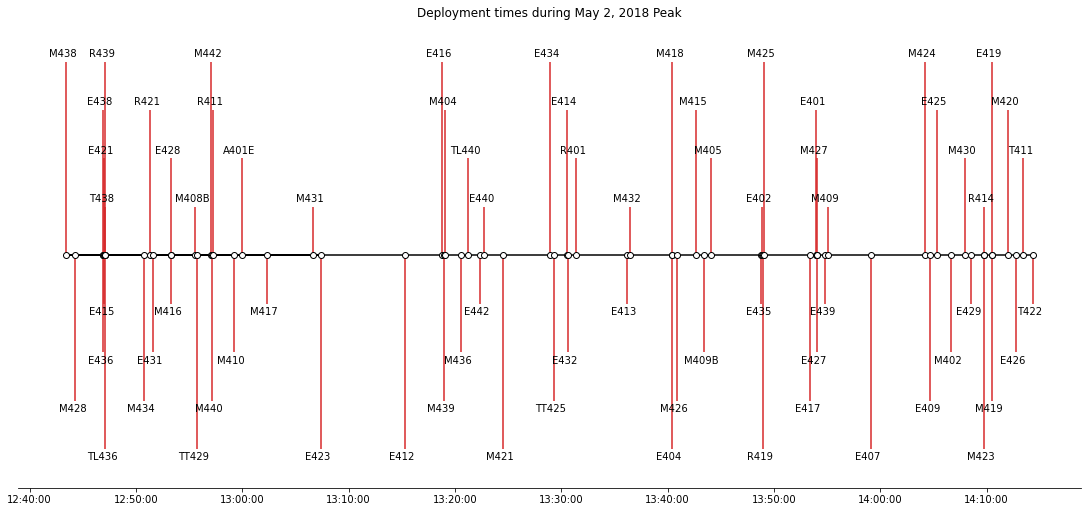

In [148]:
units=[]
times=[]
offset=-2
for k,v in overall_max_dict.items():
    print(k,v['CAD_Timestamp'][:offset])
    new_date = datetime.datetime.strptime(v['CAD_Timestamp'][:offset], '%Y%m%d%H%M%S')
    units.append(k)
    times.append(new_date)

levels = np.tile([-.04, .04,-.03, .03,-.02, .02,-.01, .01],
                 int(np.ceil(len(times)/8)))[:len(times)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 7), constrained_layout=True)
ax.set(title="Deployment times during May 2, 2018 Peak")

ax.vlines(times, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(times, np.zeros_like(times), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(times, levels, units):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
#plt.xticks( rotation=25 )
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [21]:
rescue_day_max_dict

{'20170101': (0.375, 0.3333333333333333),
 '20170102': (0.25, 0.5),
 '20170103': (0.5, 0.25),
 '20170104': (0.375, 0.6666666666666666),
 '20170105': (0.375, 0.3333333333333333),
 '20170106': (0.25, 1.0),
 '20170107': (0.25, 1.0),
 '20170108': (0.375, 0.3333333333333333),
 '20170109': (0.375, 0.3333333333333333),
 '20170110': (0.625, 0.4),
 '20170111': (0.375, 0.6666666666666666),
 '20170112': (0.375, 0.0),
 '20170113': (0.375, 0.6666666666666666),
 '20170114': (0.375, 0.6666666666666666),
 '20170115': (0.375, 0.3333333333333333),
 '20170116': (0.25, 0.5),
 '20170117': (0.375, 0.3333333333333333),
 '20170118': (0.25, 0.0),
 '20170119': (0.375, 1.0),
 '20170120': (0.375, 0.3333333333333333),
 '20170121': (0.25, 0.5),
 '20170122': (0.25, 0.0),
 '20170123': (0.625, 0.8),
 '20170124': (0.5, 0.75),
 '20170125': (0.375, 0.6666666666666666),
 '20170126': (0.375, 0.0),
 '20170127': (0.5, 0.5),
 '20170128': (0.375, 0.6666666666666666),
 '20170129': (0.375, 0.3333333333333333),
 '20170130': (0.25

In [26]:
# clean up all dictionaries
# loop through all possible days
def fill_in_blanks(in_dict,day_list):
    temp_dict=in_dict.copy()
    counter=0
    for i in day_list:
        counter+=1
        day=str(i)
        if day not in temp_dict:
            temp_dict[day]=(0.0,0.0)
    #print('counter:',counter)
    return temp_dict
day_list=overall_day_max_dict.keys()
ambulance_day_max_dict=fill_in_blanks(ambulance_day_max_dict,day_list)
rescue_day_max_dict=fill_in_blanks(rescue_day_max_dict,day_list)
ttt_day_max_dict=fill_in_blanks(ttt_day_max_dict,day_list)
essential_day_max_dict=fill_in_blanks(essential_day_max_dict,day_list)

# should have 1462 days total
# show all lens
print('overall:',len(overall_day_max_dict))
print('ambulance:',len(ambulance_day_max_dict))
print('engine:',len(engine_day_max_dict))
print('medic:',len(medic_day_max_dict))
print('rescue:',len(rescue_day_max_dict))
print('ttt:',len(ttt_day_max_dict))
print('essential:',len(essential_day_max_dict))

overall: 1462
ambulance: 1462
engine: 1462
medic: 1462
rescue: 1462
ttt: 1462
essential: 1462


In [27]:
def basic_stats(dict):
    deploy_sum=sum([pair[0] for pair in dict.values()])
    print('mean max deploy:',round(deploy_sum/len(dict.values()),3))
    deploy_stdev=statistics.stdev([pair[0] for pair in dict.values()])
    print('stdev max deploy:',round(deploy_stdev,3))
    
    out_deploy_sum=sum([pair[1] for pair in dict.values()])
    print('mean out of sector during max deploy:',round(out_deploy_sum/len(dict.values()),3))
    out_deploy_stdev=statistics.stdev([pair[1] for pair in dict.values()])
    print('stdev of out of sector during max deploy:',round(out_deploy_stdev,3))
    
    #print('mean max deploy:',round(sum(dict.values())/len(dict.values()),3))
    #print('stdev max deploy:',round(statistics.stdev(dict.values()),3))

print('\n# overall:')
basic_stats(overall_day_max_dict)

print('\n# ambulance:')
basic_stats(ambulance_day_max_dict)

print('\n# engine:')
basic_stats(engine_day_max_dict)

print('\n# medic:')
basic_stats(medic_day_max_dict)

print('\n# rescue:')
basic_stats(rescue_day_max_dict)

print('\n# ttt:')
basic_stats(ttt_day_max_dict)

print('\n# essential:')
basic_stats(essential_day_max_dict)


# overall:
mean max deploy: 0.197
stdev max deploy: 0.032
mean out of sector during max deploy: 0.473
stdev of out of sector during max deploy: 0.119

# ambulance:
mean max deploy: 0.054
stdev max deploy: 0.032
mean out of sector during max deploy: 0.43
stdev of out of sector during max deploy: 0.432

# engine:
mean max deploy: 0.237
stdev max deploy: 0.049
mean out of sector during max deploy: 0.434
stdev of out of sector during max deploy: 0.173

# medic:
mean max deploy: 0.354
stdev max deploy: 0.056
mean out of sector during max deploy: 0.473
stdev of out of sector during max deploy: 0.138

# rescue:
mean max deploy: 0.399
stdev max deploy: 0.106
mean out of sector during max deploy: 0.563
stdev of out of sector during max deploy: 0.303

# ttt:
mean max deploy: 0.155
stdev max deploy: 0.037
mean out of sector during max deploy: 0.506
stdev of out of sector during max deploy: 0.235

# essential:
mean max deploy: 0.35
stdev max deploy: 0.053
mean out of sector during max deploy: 0.4

In [12]:
#print('overall max deploy %:',round(overall_max_deployment/capacity_df['CAD_UnitID'].nunique(),3))
#print('ambulance max deploy %:',round(ambulance_max_deployment/capacity_df[capacity_df['unit_type']=='ambulance']['CAD_UnitID'].nunique(),3))
#print('engine max deploy %:',round(engine_max_deployment/capacity_df[capacity_df['unit_type']=='engine']['CAD_UnitID'].nunique(),3))
#print('medic max deploy %:',round(medic_max_deployment/capacity_df[capacity_df['unit_type']=='medic']['CAD_UnitID'].nunique(),3))
#print('rescue max deploy %:',round(rescue_max_deployment/capacity_df[capacity_df['unit_type']=='rescue squad']['CAD_UnitID'].nunique(),3))
#print('ttt max deploy %:',round(ttt_max_deployment/capacity_df[capacity_df['unit_type']=='truck/tiller/tower']['CAD_UnitID'].nunique(),3))
print('essential max deploy %:',round(essential_max_deployment/essential_df['CAD_UnitID'].nunique(),3))

essential max deploy %: 0.671


In [18]:
plt.rcParams["figure.figsize"] = (12,6)

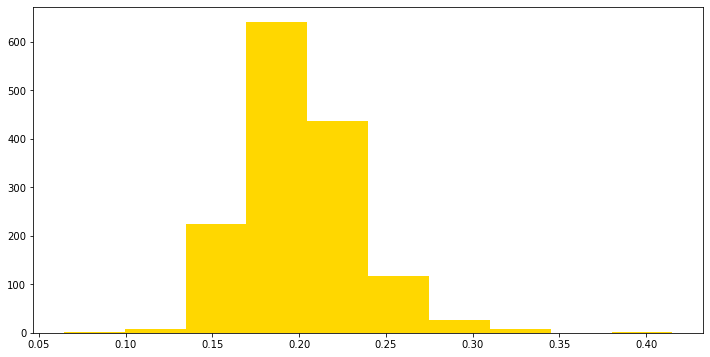

In [17]:
# shows our deployment rates for the overall fleet
plt.hist([pair[0] for pair in overall_day_max_dict.values()],color='gold')
plt.show()

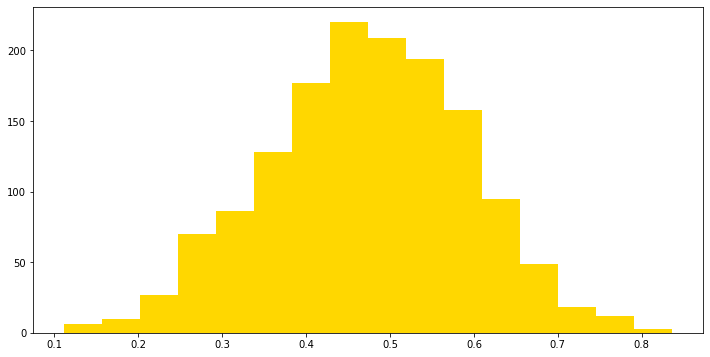

In [18]:
# this time view shows out of sector rate for the overall fleet
plt.hist([pair[1] for pair in overall_day_max_dict.values()],16,color='gold')
plt.show()

In [24]:
# find the day for max deployment and max out of sector %
def max_day(my_dict):
    deploy_list=[pair[0] for pair in my_dict.values()]
    list_max=max(deploy_list)
    max_index=list(deploy_list).index(list_max)
    print('max index:',max_index)
    print('max day:',list(my_dict.keys())[max_index])
    print(list(deploy_list)[max_index])
    
    oos_list=[pair[1] for pair in my_dict.values()]
    list_max=max(oos_list)
    max_index=list(oos_list).index(list_max)
    print('\nout of sector max index:',max_index)
    print('out of sector max day:',list(my_dict.keys())[max_index])
    print(list(oos_list)[max_index])
    
   
print('\n*** essential:')
max_day(essential_day_max_dict)

print('\n*** engine:')
max_day(engine_day_max_dict)

print('\n*** ttt:')
max_day(ttt_day_max_dict)

print('\n*** ambulance:')
max_day(ambulance_day_max_dict)

print('\n*** medic:')
max_day(medic_day_max_dict)

print('\n*** rescue:')
max_day(rescue_day_max_dict)


*** essential:
max index: 486
max day: 20180502
0.6707317073170732

out of sector max index: 1082
out of sector max day: 20191219
0.825

*** engine:
max index: 1298
max day: 20200722
0.6041666666666666

out of sector max index: 753
out of sector max day: 20190124
0.9230769230769231

*** ttt:
max index: 371
max day: 20180107
0.3225806451612903

out of sector max index: 13
out of sector max day: 20170114
1.0

*** ambulance:
max index: 929
max day: 20190920
0.25

out of sector max index: 3
out of sector max day: 20170104
1.0

*** medic:
max index: 373
max day: 20180109
0.5714285714285714

out of sector max index: 488
out of sector max day: 20180504
0.8888888888888888

*** rescue:
max index: 486
max day: 20180502
0.875

out of sector max index: 5
out of sector max day: 20170106
1.0


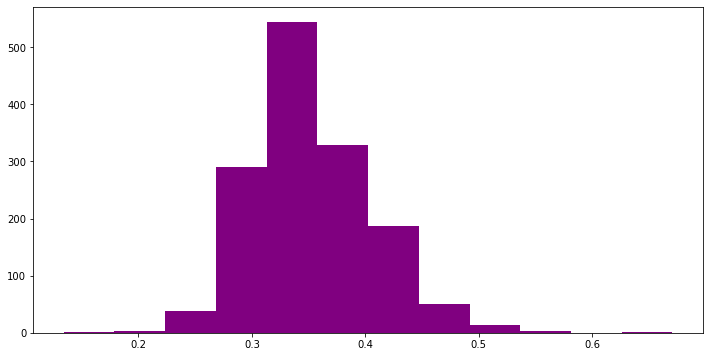

In [23]:
plt.hist([pair[0] for pair in essential_day_max_dict.values()],12,color='purple')
# plt.hist(list(essential_day_max_dict.values()),color='purple')
plt.show()

In [ ]:
list_max=max(essential_day_max_dict.values())
max_index=list(essential_day_max_dict.values()).index(list_max)
list(essential_day_max_dict.keys())[max_index]

In [ ]:
# engines = red, medics = blue, rescue = black
x1 = list(overall_day_max_dict.values())
x2 = list(ambulance_day_max_dict.values())
x3 = list(engine_day_max_dict.values())
x4 = list(medic_day_max_dict.values())
x5 = list(rescue_day_max_dict.values())
x6 = list(ttt_day_max_dict.values())
bins = np.linspace(0,.9,20)
colors=['gold','red','blue','black']
plt.hist([x1,x3,x4,x5], bins, label=['overall','engine','medic','rescue'],color=colors)
plt.legend(loc='upper right'),
plt.show()

In [ ]:
# truck = green, amb = blue
colors=['gold','blue','green']
plt.hist([x1,x2,x6], bins, label=['overall','ambulance','ttt'],color=colors)
plt.legend(loc='upper right')
plt.show()

In [ ]:
bins=20
plt.hist(overall_day_max_dict.values(),bins,alpha=0.5, label='overall')
plt.hist(ambulance_day_max_dict.values(),bins,alpha=0.5, label='ambulance')
plt.hist(engine_day_max_dict.values(),bins,alpha=0.5, label='engine')
plt.hist(medic_day_max_dict.values(),bins,alpha=0.5, label='medic')
plt.hist(rescue_day_max_dict.values(),bins,alpha=0.5, label='rescue')
plt.hist(ttt_day_max_dict.values(),bins,alpha=0.5, label='ttt')
plt.legend(loc='upper right')
plt.show()

In [ ]:
total_days=len(overall_day_max_dict)
print('total days:',total_days)

In [33]:
ttt_day_max_dict['20180502']

(0.2903225806451613, 0.8888888888888888)

In [16]:
def thresholds(day_list):
    days_10_25=len([i for i in day_list if i >= .1 and i < .25])
    days_25_50=len([i for i in day_list if i >= .25 and i < .5])
    days_50=len([i for i in day_list if i >= .5])

    print('days 10% - 25%:',days_10_25,round(days_10_25/len(day_list),2))
    print('days 25% - 50%:',days_25_50,round(days_25_50/len(day_list),2))
    print('days 50%+:',days_50,round(days_50/len(day_list),2))
    
print('\n# overall:')
# thresholds(list(pair[0] for pair in overall_day_max_dict.values()))

print('\n# ambulance:')
# thresholds(list(pair[0] for pair in ambulance_day_max_dict.values()))

print('\n# engine:')
# thresholds(list(pair[0] for pair in engine_day_max_dict.values()))

print('\n# medic:')
# thresholds(list(pair[0] for pair in medic_day_max_dict.values()))

print('\n# rescue:')
# thresholds(list(pair[0] for pair in rescue_day_max_dict.values()))

print('\n# ttt:')
# thresholds(list(pair[0] for pair in ttt_day_max_dict.values()))

print('\n# essential:')
thresholds(list(pair[0] for pair in essential_day_max_dict.values()))


# overall:

# ambulance:

# engine:

# medic:

# rescue:

# ttt:

# essential:
days 10% - 25%: 22 0.02
days 25% - 50%: 1422 0.97
days 50%+: 18 0.01


In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [16, 8] 
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_ticks(np.arange(1, 365, 30))
ax.plot(list(overall_day_max_dict.keys())[:365], list(overall_day_max_dict.values())[:365]);

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [16, 8] 
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_ticks(np.arange(1, 365, 30))
ax.plot(list(overall_day_max_dict.keys())[365:365*2], list(overall_day_max_dict.values())[365:365*2]);

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [16, 8] 
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_ticks(np.arange(1, 365, 30))
ax.plot(list(overall_day_max_dict.keys())[365*2:365*3], list(overall_day_max_dict.values())[365*2:365*3]);

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [16, 8] 
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_ticks(np.arange(1, 365, 30))
ax.plot(list(overall_day_max_dict.keys())[365*3:365*4+1], list(overall_day_max_dict.values())[365*3:365*4+1]);

In [ ]:
day_of_week=[]
days_of_wk=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
week_len=len(days_of_wk)
counter=week_len
while counter < total_days:
    day_of_week+=days_of_wk
    counter+=week_len
    
diff=total_days-len(day_of_week)
day_of_week+=days_of_wk[:diff]
day_of_week[:20]

max_by_day_df = pd.DataFrame(
    {'day': overall_day_max_dict.keys(),
     'max_pct': overall_day_max_dict.values(),
     'day_of_week': day_of_week
    })
max_by_day_df

In [ ]:
# mark holidays
def mark_holidays(x):
    if x[4:]=='0101':
        return 'new years day'
    elif x[4:]=='1231':
        return 'new years eve'
    elif x[4:]=='1225':
        return 'xmas'
    elif x[4:]=='1224':
        return 'xmas eve'
    elif x[4:]=='1031':
        return 'halloween'
    elif x[4:]=='0704':
        return '4th of july'
    
    # specific thanksgiving dates
    elif x in ['20201126','20191128','20181122','20171123']:
        return 'thanksgiving'
    elif x in ['20201125','20191127','20181121','20171122']:
        return 'thanksgiving eve'
    elif x in ['20200907','20190902','20180903','20170904']:
        return 'labor day'
    elif x in ['20200525','20190527','20180528','20170529']:
        return 'memorial day'
    
    # nothing picked up return none
    return 'none'

max_by_day_df['holiday'] = max_by_day_df.apply(lambda x: mark_holidays(x['day']), axis=1)

In [ ]:
max_by_day_df[max_by_day_df['holiday']=='4th of july']

In [ ]:
new_df=max_by_day_df.groupby(['day_of_week']).mean()
res = new_df.apply(lambda x: x.sort_values(ascending=False))
print(res)
ax=res.unstack().plot.barh()
ax.invert_yaxis()

In [ ]:
new_df=max_by_day_df.groupby(['holiday']).mean()
res = new_df.apply(lambda x: x.sort_values(ascending=False))
print(res)
ax=res.unstack().plot.barh()
ax.invert_yaxis()

In [ ]:
max_df=pd.DataFrame.from_dict(max_dict.values())
max_df

In [ ]:
max_df=max_df[max_df['IncidentNumber'].isin(['E181221324','E181221450'])]
max_df[['UnitBattalion','UnitStation','CAD_UnitID','IncidentNumber']].groupby(['IncidentNumber','UnitBattalion']).agg(['count'])